<div align="center">
<img src ="https://annual.ametsoc.org/themes/annual/images/AMS22_Logo_300.png" width=25% alt="American Meteorological Society logo">
<img src="../../logos/unidata_logo_horizontal.png" width=25% alt="Unidata logo">
</div>

# Python Workshop
### AMS Student Conference 2022

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note</p>
    If running this notebook on a local computer, the <code>pyaos-ams-2022</code> conda environment must be activated.
</div>

## Table of Contents <a class="anchor" id="top"></a>

* [Objective](#objective)
* [Strategy](#strategy)
* [Step 0: Import required packages](#step0)
* [Step 1: Browse the THREDDS Data Server (TDS)](#step1)
* [Step 2: Model output, equivalent potential temperature ($\theta_e$)](#step2)
    * [Step 2a: Obtain Model Output](#step2a)
    * [Step 2b: Prepare Model Output](#step2b)
    * [Step 2c: Visualize Model Output](#step2c)

## Objective
Create a color-filled contour plot of equivalent potential temperature ($\theta_e$) on geographic axes.

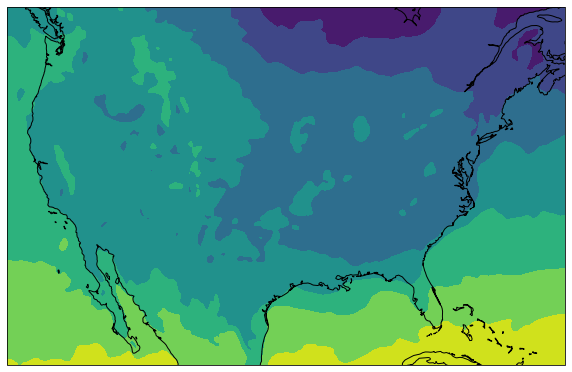

[Top](#top)

## Strategy <a class="anchor" id="strategy"></a>

Creating plots like this using MetPy follows this basic workflow:

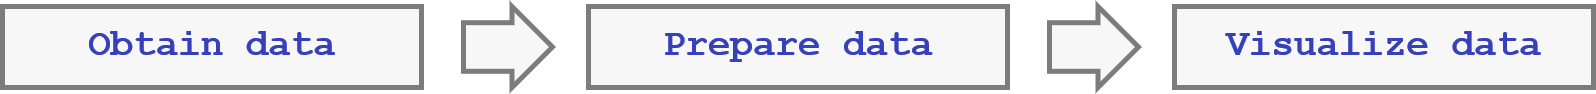

We will use the Real-time Meso-analysis (RTMA) output available on the Unidata-hosted THREDDS Data Server, then calculate $\theta_e$ from the available variables, and finally plot the field on geographic axes. 

[Top](#top)

## Step 0: Import required packages <a class="anchor" id="step0"></a>

First, we need to import all our required packages. Today we're working with:
- cartopy
- matplotlib
- metpy
- siphon

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# We will use the standard "plt" abbreviation to access matplotlib
import matplotlib.pyplot as plt

import metpy.calc as mpcalc
import metpy.plots as mpplots

# Here is where we import the TDSCatalog class from siphon for obtaining our data 
from siphon.catalog import TDSCatalog

[Top](#top)

## Step 1: Browse the THREDDS Data Server (TDS) <a class="anchor" id="step1"></a>

The **THREDDS Data Server** provides us with coherent access to a large collection of real-time and archived datasets from a variety of environmental data sources at a number of distributed server sites. 
You can browse the TDS in your web browser using this link: <a href="https://thredds.ucar.edu/" target ="blank">https://thredds.ucar.edu/</a>


[Top](#top)

## Step 2: Obtain, Prepare, and Visualize an Equivalent Potential Temperature ($\theta_e$) Field <a class="anchor" id="step2"></a>

Now we grab data from the [Real-time Meso-analysis (RTMA)](https://nomads.ncep.noaa.gov/txt_descriptions/RTMA_doc.shtml), which gives us a gridded estimate of the realtime conditions. Our goal is to use MetPy to calculate <a href="https://glossary.ametsoc.org/wiki/Equivalent_potential_temperature" target="blank">equivalent potential temperature ($\theta_e$)</a>, using the fields we have available in the RTMA. 

We are using the basic obtain > prepare > visualize workflow to accomplish this task. We can expand our strategy diagram to include more detail as below: 

<div>
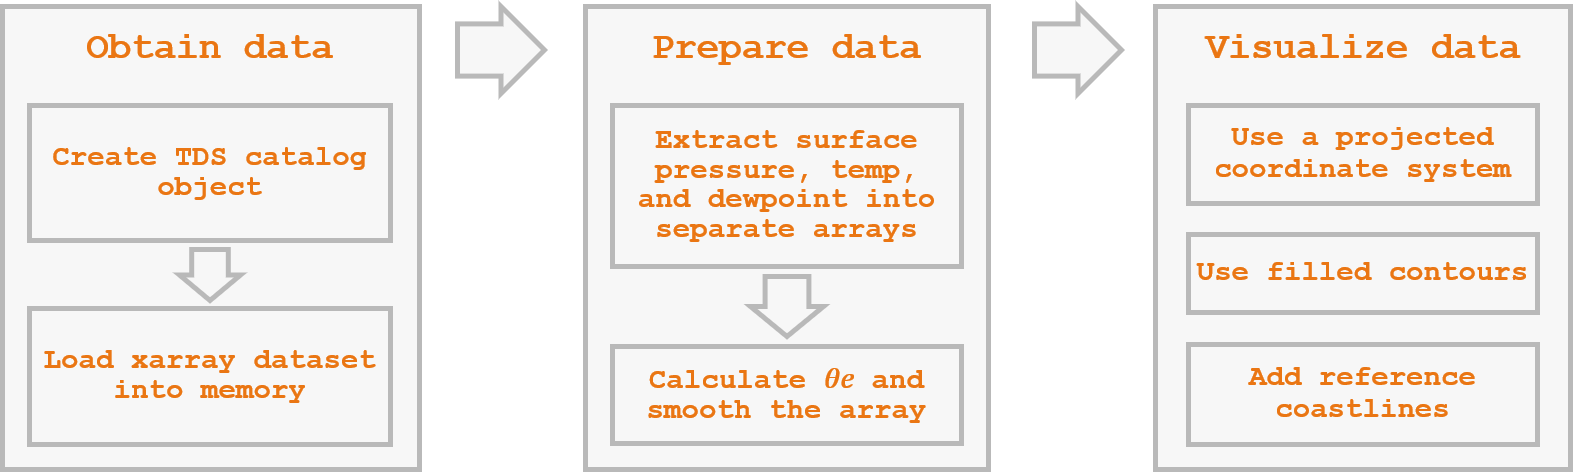
</div>

[Top](#top)

### Step 2a: Obtain Model Output <a class="anchor" id="step2a"></a>

We will use siphon's TDSCatalog object to create a catalog of satellite data from the TDS that match our criteria (RTMA from NCEP, over CONUS). Then we use siphon's remote_access method to read in the latest dataset from the catalog into an `xarray.Dataset`.

Notice the use of the `squeeze()` method! Our provided dataset might have stray dimensions that we don't really benefit from keeping around. Feel free to compare what this dataset looks like with and without using this.

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note</p>
    Notice the URL in the TDSCatalog input ends with .xml rather than .html. While your web browser uses html to show you the data in a human-friendly webpage, siphon requires an xml document to create the TDSCatalog object.
</div>

In [2]:
# Create TDS catalog object
rtma_cat = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RTMA/CONUS_2p5km/catalog.xml')

# Using xarray, we pull the data from the TDS into an xarray DataSet object
rtma_data = rtma_cat.datasets['Latest Collection for Real Time Mesoscale Analysis 2.5 km'].remote_access(use_xarray=True)
rtma_data = rtma_data.metpy.parse_cf().squeeze()

[Top](#top)

### Step 2b: Prepare Model Output and Calculate $\theta_e$ <a class="anchor" id="step2b"></a>

Before we calculate a derived variable such as $\theta_e$, we need to look up the required variables to calculate that variable. Looking at the metpy.calc documentation for <a href ="https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.equivalent_potential_temperature.html#metpy.calc.equivalent_potential_temperature" target="blank">equivalent potential temperature</a>, we can see that this function requires three variables: **surface pressure**, **temperature**, and **dewpoint**. Each of these variables are contained in the rtma_data Dataset, but we need to know the name of each variable as it is stored in the Dataset. 


<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Activity: Find RTMA Variable Names</p>
    <code>rtma_data</code> is an xarray Dataset containing several variables. Use the cell below to programmatically display the list of all variables in the Dataset, then find the names of the <b>surface pressure</b>, <b>temperature</b>, and <b>dewpoint</b> variables. 
</div>


In [3]:
# ACTIVITY: Find RTMA Variable Names

## INSTRUCTOR'S ANSWER KEY ##
# Recall from prework
# Have learner share in chat window
# NOTE: without using print, errors come up accessing one specific variable before the variable list is displayed
rtma_data

<xarray.Dataset>
Dimensions:                                                              (: 2, x: 2145, y: 1377)
Coordinates:
    reftime                                                              datetime64[ns] ...
    time1                                                                datetime64[ns] ...
  * x                                                                    (x) float32 ...
  * y                                                                    (y) float32 ...
    time                                                                 datetime64[ns] ...
    height_above_ground                                                  float32 ...
    metpy_crs                                                            object ...
    altitude_above_msl                                                   float32 ...
    height_above_ground1                                                 float32 ...
Dimensions without coordinates: 
Data variables: (12/22)
    LambertConformal_Projection                                          int32 ...
    time1_bounds                                                         () datetime64[ns] ...
    Dewpoint_temperature_error_height_above_ground                       (y, x) float32 ...
    Dewpoint_temperature_Analysis_height_above_ground                    (y, x) float32 ...
    Geopotential_height_Analysis_surface                                 (y, x) float32 ...
    Pressure_error_surface                                               (y, x) float32 ...
    ...                                                                   ...
    Wind_speed_error_height_above_ground                                 (y, x) float32 ...
    Wind_speed_Analysis_height_above_ground                              (y, x) float32 ...
    Wind_speed_gust_error_height_above_ground                            (y, x) float32 ...
    Wind_speed_gust_Analysis_height_above_ground                         (y, x) float32 ...
    u-component_of_wind_Analysis_height_above_ground                     (y, x) float32 ...
    v-component_of_wind_Analysis_height_above_ground                     (y, x) float32 ...
Attributes:
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    file_format:                                                             ...
    Conventions:                                                             ...
    history:                                                                 ...
    featureType:                                                             ...
    _CoordSysBuilder:                                                        ...

Surface pressure is stored in the *"Pressure_Analysis_surface"* variable name, which we'll use to select the corresponding DataArray within. Note that creating a new variable is not *necessary*, but can save you some time later and make your code more readable.

In [4]:
# Store the surface pressure DataArray to variable `pres`
pres = rtma_data.Pressure_Analysis_surface

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Activity: Create Temperature and Dewpoint DataArrays</p>
    Using the information from the previous activity and following the demonstration in the previous cell, create <code>temp</code> and <code>dewp</code> variables that represent the surface temperature and dewpoint, respectively. 
</div>

In [5]:
# ACTIVITY: Create Temperature and Dewpoint DataArrays

# temp = 
# dewp = 


## INSTRUCTOR'S ANSWER KEY ##
temp = rtma_data.Temperature_Analysis_height_above_ground
dewp = rtma_data.Dewpoint_temperature_Analysis_height_above_ground

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Activity: Calculate theta_e</p>
    Now, calculate equivalent potential temperature using the  <a href ="https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html" target="blank">metpy.calc documentation</a>. Create a variable called <code>theta_e</code> to represent the equivalent potential temperature field.
</div>

In [6]:
# ACTIVITY: Calculate theta_e


# theta_e = 



## INSTRUCTOR'S ANSWER KEY ##
theta_e = mpcalc.equivalent_potential_temperature(pres, temp, dewp)

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Challenge: Calculate another variable</p>
    Locate another derived variable in the metpy.calc documentation that takes in any combination of surface pressure, temperature, or dewpoint, then calculate it as a new variable. Optionally, plot it using any plotting tool to visualize the output.
</div>

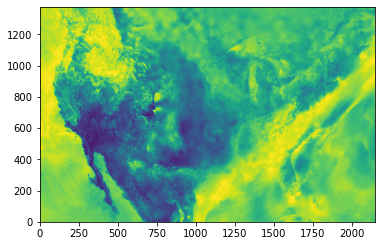

In [7]:
# CHALLENGE: Calculate another variable



## INSTRUCTOR'S ANSWER KEY ##
# one of many possibilities
rh = mpcalc.relative_humidity_from_dewpoint(temp, dewp)
plt.imshow(rh, origin="lower")

Now, smooth the theta_e array using a gaussian filter. This will improve the readability of the final plot.

In [8]:
# smooth the theta_e array
theta_e = mpcalc.smooth_gaussian(theta_e, n=50)

We can use MetPy shortcuts to create a cartopy <a href="https://scitools.org.uk/cartopy/docs/latest/crs/index.html#cartopy.crs.CRS">cartographic reference system</a> for our data. RTMA uses a Lambert Conformal projection, which we will use in our final plot. This is our final data preparation step for the `theta_e` DataArray. 

In [9]:
# Create the crs object for the theta_e array
rtma_crs = theta_e.metpy.cartopy_crs

[Top](#top)

### Step 2c: Visualize Model Output <a class="anchor" id="step2c"></a>

The data are now prepared for plotting. Let's use **filled contours** for visualizing the $\theta_e$ field and add cartopy's built-in `coastlines` class for geographic context.  

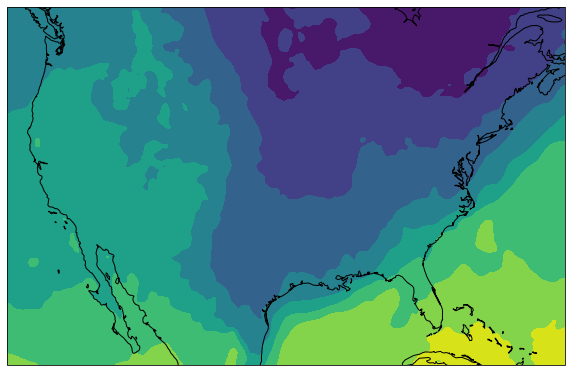

In [10]:
# Create figure, axes, then use contourf to create filled contours of the theta_e field
fig = plt.figure(figsize=[10,20])
ax = fig.add_subplot(projection=rtma_crs)
ax.contourf(theta_e['x'], theta_e['y'], theta_e, transform=rtma_crs)
ax.coastlines()

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Tip</p>
    If you are working with xarray DataArrays parsed via <code>metpy.parse_cf</code>, and you aren't sure what your horizontal variables (e.g. x, or lon, or latitude) are named, or you just want a shortcut, you can access these quickly with <code>xarray.metpy.x</code> and <code>xarray.metpy.y</code>.<br><br>For example, these two lines of code are equivalent for DataArrays parsed with <code>metpy.parse.cf</code>:<br><br>
    <code>ax.contourf(theta_e['x'], theta_e['y'], theta_e, transform=rtma_crs)</code><br>
    <code>ax.contourf(theta_e.metpy.x, theta_e.metpy.y, theta_e, transform=rtma_crs)</code>
</div>

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Activity: Contour plots</p>
    You will complete this activity as a part of a team. You will be assigned a group number and you will document your output on your group's designated slide in the provided presentation.<br>
    <ol>
    <li>Plot <code>theta_e</code> using the <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html" target="blank">matplotlib <code>contour()</code> plot type</a>.</li>
    <li>Use the LambertConformal projection in your axes, the same projection the RTMA dataset uses.</li>
    <li>Add coastlines.</li>
    <li>Make the contours a single color (<a href="https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html" target="blank">see examples here</a>).</li>
    <li>Add a descriptive title to your plot.</li>
    <li>Copy your plot into your group's designated slide at the link provided.</li> 
        <dl>
            <dd>To copy an image from a notebook: Shift + right click on the image, then select Copy image</dd>
        </dl>
    </ol>
    <b>After your group has created the <code>theta_e</code> plot</b>, look to create more contour plots of other RTMA variables you have created in this notebook or any other <a href="https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html">calculations</a>. Choose any colors, but label your plots with titles that describe the variable(s) plotted. 
</div>


In [11]:
# ACTIVITY: Contour plots




## INSTRUCTOR'S ANSWER KEY ##
#ax = plt.axes(projection=rtma_crs)
#ax.contour(theta_e.metpy.x, theta_e.metpy.y, theta_e, transform=rtma_crs, colors='blue')
#ax.coastlines()

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Challenge: Make the plot your own</p>
   Use the remaining time to stylize your plot to you liking. Use the cell below to experiment with your plot.<br> 
Some ideas:
    <ul>
        <li>Stylize the title of the plot, changing the size</li>
        <li>Change the colors of the contours</li>
        <li>Swap the theta_e contours with another RTMA variable, or add other contours</li>
    </ul>
Challenges: 
    <ul>
        <li>Make this a multi-panel plot with separate axes for each variable plotted</li>
        <li>Add labels to your theta_e contours</li>
        <li>Review the MetPy example gallery and add elements to your plot</li>
        <dl>
            <dd><a href="https://unidata.github.io/MetPy/latest/examples/index.html" target="blank">https://unidata.github.io/MetPy/latest/examples/index.html</a></dd>
        </dl>
    </ul>
Share your final plots with us! <a href="https://twitter.com/Metpy" target="blank">@metpy on Twitter</a> 

</div>